# Métodos Numericos 2023

## Parcial 1 - Tema 3

### Fecha de entrega 

25 de Abril de 2022

### Nota sobre la programación en Julia

Recuerde que su notebook tiene que poder ser entendida por otra persona. Para ello:

* Cuando crea conveniente, use texto Markdown para desarrollar o comentar una idea.

* Agregue comentarios a su código de ser necesario.

* Realice gráficos que tengan etiquetas en los ejes y leyendas para cada curva o serie de puntos graficados, como así también un título apropiado.

* Procure respetar reglas de buena programación:

    * Use sangrías adecuadamente.

    * Cuando sea posible, implemente funciones de caracter general, en vez de código específico a cada problema, facilitando así la reutilización de código.

    * Implemente funciones que tengan los argumentos necesarios para su buen funcionamiento.

In [65]:
using Plots
using LaTeXStrings
using DataFrames

## Problema 1

Se desea crear un programa que calcule el Máximo Común Divisor (MCD) de dos números enteros ingresados por el usuario. 
Para ello, se utilizará el algoritmo de Euclides, el cual consiste en dividir el número mayor entre el número menor y luego dividir el divisor entre el resto obtenido hasta llegar a un resto de cero.
El último divisor será el MCD de los dos números ingresados.

Algoritmo de Euclides tradicional implementado de manera iterativa (Wikipedia) puede, básicamente, describirse con el siguiente pseudocódigo

    function mcd_euclides(m,p)
        while p != 0
            m,p = p,m%p
        end
        return m
    end

Consignas:

1. Programe una función `mcd_euclides(m,p)`, que tome dos números enteros `m` y `p` como argumentos. La función deberá retornar el MCD.

    La función deberá incluir un *argumento opcional* de tipo booleano llamado `verbose` normalmente  (i.e. por default) seteado al valor `false`. Cuando dicho argumento sea `true`, la función deberá imprimir por pantalla el número de iteraciones que utilizó para calcular el MCD que retorna. La última iteración del resto cero debe tenerse en cuenta en dicho cálculo.

2. Calcule el MCD de:

        mcd_euclides(255,195)
        mcd_euclides(85,195)
        mcd_euclides(46905159,39173043)
        
    reportando en pantalla el número de iteraciones utilizados en cada caso.

# Problema 2

Considere dos móviles, 1 y 2, que se mueven sobre el eje $x$. 
El móvil 1 se desplaza con velocidad constante y el móvil 2 con una aceleración $a_{2}(t)$.
El objetivo es calcular, numéricamente, una aproximación al tiempo $t$ y a la posición $x(t)$ en que los móviles se encuentran.

Para ello, siga los siguientes pasos:

1. Utilizando sus conocimientos de cinemática, encuentre las funciones de movimiento de los móviles, $x_{1}(t)$ y $x_{2}(t)$, considerando:

    * la posición inicial del móvil 1, $x_1(0)=-16m$,
    * la velocidad inicial del móvil 1, $v_1(0)=4ms^{-1}$,
    * la aceleración del móvil 1, $a_1(t)=0ms^{-2}$ para todo $t$,
    * la posición inicial del móvil 2, $x_2(0)= 18m$,
    * la velocidad inicial del móvil 2, $v_2(0)= -12ms^{-1}$, y
    * la aceleración del móvil 2, $a_2(t)= \exp(-ct)ms^{-2}$ con $c=0.1s^{-1}$ para todo $t$.

    Notar, el móvil 1 se mueve con velocidad constante y el móvil 2, con aceleración variable. **Ayuda:** La función de movimiento del móvil 2 es de la forma $x_2(t) = a + bt + c^{-2}\exp(-ct)$, con constantes de integración $a$ y $b$ determinadas por las condiciones iniciales.

2. Grafique las funciones de movimiento $x_1(t)$  y  $x_2(t)$, entre $t=0s$ y $t=5s$.

3. Calcule la coordenada diferencia $f(t)=x_1(t)-x_2(t)$ y la derivada $f'(t)$ (ya que la necesitará para el método de Newton) y grafíquelas en el mismo intervalo.

4. Determine el instante $t$ y la posición $x(t)$ para el encuentro de los dos móviles con direcciones iniciales opuestas. Para ello:

    1. Escriba funciones que encuentren la raíz $t$ de la función $f$:
 
        1. utilizando el método de bisección.

        2. utilizando el método de la secante.

        3. utilizando el método de Regula Falsi.

        4. utilizando el método de Newton.
    
        * Estas funciones deberán imprimir un mensaje cuando los correspondientes algoritmos no converjan tras `nmax=100` iteraciones. 
        
        * Además, deberán retornar una tupla `list_p,list_e,list_f` en donde `list_p` es un array de aproximaciones $p_1,p_2,...,p_n$ de la raíz, `list_e`, es un array de correspondientes estimaciones de errores relativos $r_1,r_2,...,r_n$ (por ejemplo, $r_i = |p_i-p_{i+1}|/|p_{i+1}|$ para Newton) y `list_f` es un array de correspondientes valores $f(p_1),f(p_2),...,f(p_n)$. Aquí, $n$ es el número de iteraciones utilizado por el algoritmo en cuestión.
  
    4. Con los métodos implementados, calcule approximaciones y correspondientes errores del tiempo $t$ y la correspondiente posición $x(t)=x_1(t)=x_2(t)$ a la cuál se produce el primer encuentro entre los dos móviles. Para ello, utilice `a=0.0` y `b=5.0`, para bisección, secante y Regula Falsi, y `p=0.0` para Newton. Además, utilice las tolerancias de error `tol_x = 10e-8` y `tol_y = 10e-8`.
    
    5. Grafique, en un mismo gráfico y en escala doble logarítmica, el error relativo $r_i$ en función del número de iteración $i$ para los cuatro métodos.
    
    6. Grafique $|f(t_i)|$ vs $i$ para los cuatro métodos.

    7. Sintetize los resultados en una tabla que incluya, para cada método, las aproximaciones del tiempo y posición de encuentro, sus errores, y el número de iteraciones requerido. Discuta lo observado.

In [3]:
x1_0 = -16 #m
v1_0 = 4 #m/s

x2_0 = 18 #m
v2_0 = -12 #m/s

-12

In [4]:
function x1(t;x0=x1_0,v0=v1_0)
    return v0*t + x0
end

x1 (generic function with 1 method)

In [5]:
function a2(t,c)
    return exp(-c*t)
end

a2 (generic function with 1 method)

In [6]:
function v2(t,v0;c=0.1)
    return -1/c*a2(t,c) + (v0+1/c)
end

v2 (generic function with 1 method)

In [7]:
function x2(t;x0=x2_0,v0=v2_0,c=0.1)
    return (x0 - c^(-2)) + (v0+1/c)*t + c^(-2)*a2(t,c)
end

x2 (generic function with 1 method)

In [8]:
t = 0:0.1:5

0.0:0.1:5.0

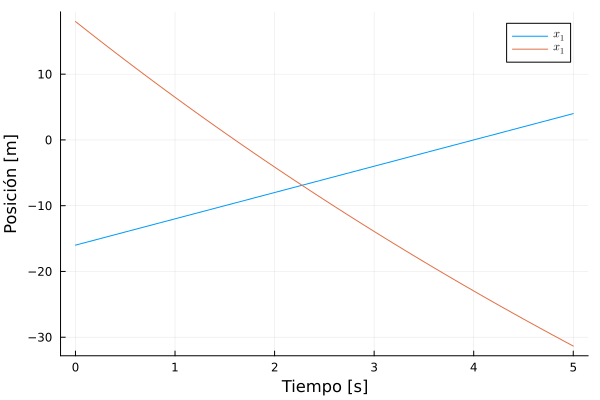

In [56]:
plot(t,x1.(t), label=L"x_1")
plot!(t,x2.(t), label=L"x_1")

plot!(xlabel="Tiempo [s]")
plot!(ylabel="Posición [m]")

In [10]:
function f(t)
    return x1(t) - x2(t)
end

f (generic function with 1 method)

In [11]:
function df(t;v10=v1_0,v20=v2_0)
    return v1_0 - v2(t,v2_0)
end

df (generic function with 1 method)

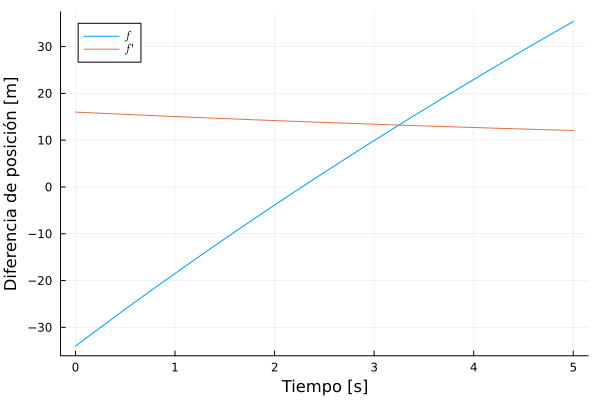

In [54]:
plot(t,f.(t), label=L"f")
plot!(t,df.(t), label=L"f'")

plot!(xlabel="Tiempo [s]")
plot!(ylabel="Diferencia de posición [m]")

In [26]:
#Biseccion

function bisection(f, a, b; nmax=100,TOLx=10e-8, TOLf=10e-8)
    
    i = 1 # iteracion inicial
    list_p   = zeros(nmax)
    list_f   = zeros(nmax)
    c        = zeros(nmax)
    list_e   = zeros(nmax)
    converge = true
    
    while i <= nmax
        FA        = f(a)          # funcion evaluada en a
        list_p[i] = a + (b-a) / 2 # aprox de la raiz
        list_f[i] = f(list_p[i])         # funcion evaluada en p
        c[i]      = abs(b-a) / 2  # error absoluto en x
        list_e[i] = c[i] / (abs(list_p[i]))  # error relativo en x
        
        if list_e[i] < TOLx && abs(list_f[i]) < TOLf
            return list_p[1:i], list_e[1:i], list_f[1:i]
        elseif sign(FA)*sign(list_f[i])>0
            a = list_p[i]
        else
            b = list_p[i]
        end
            
        if i == nmax
            converge = false
            println("No converge luego de $nmax iteraciones")
            return list_p, list_e, list_f
        end
    
        i +=1
        
    end
end

bisection (generic function with 1 method)

In [27]:
#Newton Rapson

function newton_rapson(f, df, p_0; nmax=100, TOLx=10e-8, TOLf=10e-8)
    i  = 1 # iteracion inicial
    
    list_p   = zeros(nmax)
    list_f   = zeros(nmax)
    c        = zeros(nmax)
    list_e   = zeros(nmax)
    converge = true
    
    while i <= nmax
        F0    = f(p_0)       #funcion evaluada en p₀
        dF0   = df(p_0)     # derivada evaluada en p₀
        list_p[i]  = p_0 - F0/dF0  # aprox de la raiz
        list_f[i] = f(list_p[i])        # funcion evaluada en p
        c[i]  = abs(list_p[i]-p_0)    # error absoluto en x
        list_e[i]  = c[i] / (abs(list_p[i]))  # error relativo en x

        if list_e[i] < TOLx && abs(list_f[i]) < TOLf
            return  list_p[1:i], list_e[1:i], list_f[1:i]
        else
            p_0 = list_p[i]
        end

        if i == nmax
            converge = false
            println("No converge luego de $nmax iteraciones")
            return list_p, list_e, list_f
        end
        
        i +=1
    end
end

newton_rapson (generic function with 1 method)

In [15]:
# Regula Falsi (SANTI)

# Regula Falsi
function regula_falsi(f::Function,
    a::Float64,
    b::Float64;
    tol_x::Float64 = 10e-10,
    tol_y::Float64 = 10e-10,
    max_iter::Int64 = 100)
    
    #
    p0 = a
    p1 = b 
    fp0 = f(p0)
    fp1 = f(p1)
    error_abs = abs(p1-p0) 
    error_rel = abs(p1-p0)/abs(p1)
    # comprobar que satisfacen la condicion fp0*fp1 < 0
    if fp0*fp1 > 0 
        error("Los puntos iniciales tienen el mismo signo")
    end
    
    # iteracion
    for j in 1:max_iter
        # verificar que los errores cumplen la desigualdad
        if tol_x > error_rel || tol_y > abs(fp1)
            #break
            absoluto_raiz = abs(fp1)
            return["la raiz es: $p1",
            "iteraciones: $j",
            "valor de la función: $fp1",
            "error absoluto: $error_abs",
            "error relativo: $error_rel",
            "valor absoluto de la raiz: $absoluto_raiz"]
        end
        
        #reasignacion de valores
        p2 = p1 - fp1 * (p1-p0)/(fp1-fp0)
        
        if p1*p0 > 0
            p0 = p1
        end
        
        #reasignacion de valores
        p1 = p2
        error_abs = abs(p1-p0)
        error_rel = abs(p1-p0)/abs(p1)
        fp0 = f(p0)
        fp1 = f(p1)
        
    end
    println("no converge")    
end


regula_falsi (generic function with 1 method)

In [77]:
# Regula Falsi (FRANCO)

function reg_falsi(f, p0, p1; nmax=100, TOLx=10e-8, TOLf=10e-8)
    i = 1 # iteracion inicial
    list_p   = zeros(nmax)
    list_f   = zeros(nmax)
    c        = zeros(nmax)
    list_e   = zeros(nmax)
    converge = true
    
    if f(p0)*f(p1)>0
        error("No hay raíz en el intervalo")
    else
        while i <= nmax
            F0 = f(p0)                                 # funcion evaluada en p₀
            F1 = f(p1)                                 # funcion evaluada en p₁
            
            list_p[i] = p1 - F1 * (p1 - p0)/(F1 - F0)  # aprox de la raiz
            list_f[i] = f(list_p[i])                   # funcion evaluada en p
            c         = abs(list_p[i] - p1)            # error absoluto en x
            list_e[i] = c / abs(list_p[i])             # error relativo en x

            if list_e[i] < TOLx && abs(list_f[i]) < TOLf
                return list_p[1:i], list_e[1:i], list_f[1:i]
            
            elseif F0*list_f[i] > 0
                p0 = p1
                p1 = list_p[i]
            
            else
                p1 = list_p[i]
            end

            if i == nmax
                converge = false
                println("No converge luego de $nmax iteraciones")
                return list_p, list_e, list_f
            end
            
            i +=1
        end
    end
end

reg_falsi (generic function with 1 method)

In [38]:
# Secante (SANTI)

function secante(f, a, b; 
        nmax=100,
        TOLx=10.0^-8,
        TOLf=10.0^-8)
    
    i = 1 #iteracion inicial
    list_p   = zeros(nmax)
    list_f   = zeros(nmax)
    c        = zeros(nmax)
    list_e   = zeros(nmax)
    converge = true
    
    
    while i <= nmax
        FA        = f(a)          # funcion evaluada en a
        list_p[i] = a + (b-a) / 2 # aprox de la raiz
        list_f[i] = f(list_p[i])         # funcion evaluada en p
        c[i]      = abs(b-a) / 2  # error absoluto en x
        list_e[i] = c[i] / (abs(list_p[i]))  # error relativo en x
    
        
        
    end
    
    p0 = a
    p1 = b
    fp0 = f(p0)
    fp1 = f(p1)
    error_abs = abs(p1-p0)
    error_rel = abs(p1-p0)/abs(p1)
    i = 1
    
    
    for i ∈ 1:maxiter
        
        
        if x_tol > error_rel || y_tol > abs(fp1)
            break
        end        
        
        p2 = p1 - fp1 * (p1-p0)/(fp1-fp0)  # Paso n-ésimo del algoritmo, aca p2 es nuestra aproximación.
        
        p0 = p1  # Valuo nuevamente las variables.
        p1 = p2
        
        error_abs = abs(p1-p0) # Vuelvo a calcular los errores y los valores de las funciones.
        error_rel = abs(p1-p0)/abs(p1)
        fp0 = f(p0)
        fp1 = f(p1)
        i += 1
    end
    absoluto_raiz = abs(fp1)
    return["la raiz es: $p1",
        "iteraciones $i",
        "valor de la función: $fp1",
        "error absoluto $error_abs",
        "error relativo $error_rel",
        "valor absoluto de la raiz $absoluto_raiz"]
    
end

secante (generic function with 1 method)

In [75]:
#secante (FRANCO)

function secant(f, p0, p1; nmax=100, TOLx=10e-8, TOLf=10e-8)
    i = 1 # iteracion inicial
    list_p   = zeros(nmax)
    list_f   = zeros(nmax)
    c        = zeros(nmax)
    list_e   = zeros(nmax)
    converge = true
    
    while i <= nmax
        F0 = f(p0)                                #funcion evaluada en p₀
        F1 = f(p1)                                #funcion evaluada en p₁
        list_p[i] = p1 - F1 * (p1 - p0)/(F1 - F0) # aprox de la raiz
        list_f[i] = f(list_p[i])                  # funcion evaluada en p
        c = abs(list_p[i] - p1)                   # error absoluto en x
        list_e[i] = c / (abs(list_p[i]))          # error relativo en x

        if list_e[i] < TOLx && abs(list_f[i]) < TOLf
            return list_p[1:i], list_e[1:i], list_f[1:i]
        else
            p0 = p1
            p1 = list_p[i]
        end

        if i == nmax
            println("No converge luego de $nmax iteraciones")
            return list_p, list_e, list_f
        end
        
        i +=1
    end
end

secant (generic function with 1 method)

In [74]:
enc_bis       = bisection(f,0,5)
enc_nr        = newton_rapson(f,df,0)
enc_sec       = secant(f,0.,5.)
enc_rf_franco = reg_falsi(f,0,5)

([2.451442192520779, 2.2866998212373244, 2.275916396674078, 2.275210064345758, 2.2751637963227105, 2.2751607655450496, 2.275160567014522, 2.275160554009817], [1.0396157067275487, 0.07204372421488761, 0.004738058295552831, 0.00031044708327763884, 2.033612837999011e-5, 1.3321158252803821e-6, 8.726000725023079e-8, 5.715950395507534e-9], [2.449486623306182, 0.16109398204879888, 0.010555200831436906, 0.0006914283649219755, 4.529193805957732e-5, 2.9668402437010855e-6, 1.9434231290915704e-7, 1.2730360765544901e-8])

In [34]:
enc_rf_santi = regula_falsi(f,0.,5.)

6-element Vector{String}:
 "la raiz es: 2.275160553157946"
 "iteraciones: 10"
 "valor de la función: 8.33894731044893e-10"
 "error absoluto: 2.275160553157946"
 "error relativo: 1.0"
 "valor absoluto de la raiz: 8.33894731044893e-10"

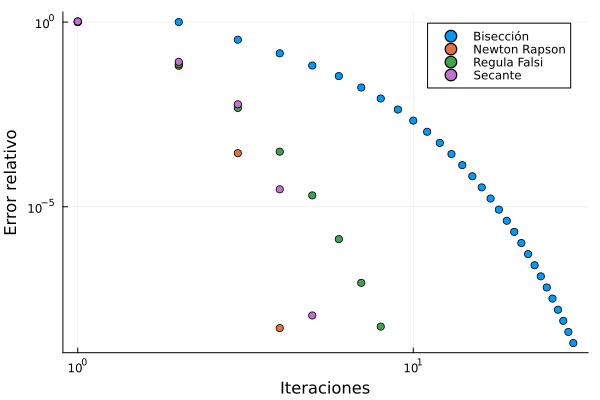

In [49]:
scatter(enc_bis[2], label="Bisección")
scatter!(enc_nr[2], label="Newton Rapson")
scatter!(enc_rf_franco[2], label="Regula Falsi")
scatter!(enc_sec[2], label="Secante")


plot!(xlabel="Iteraciones")
plot!(ylabel="Error relativo")
plot!(yscale=:log)
plot!(xscale=:log)


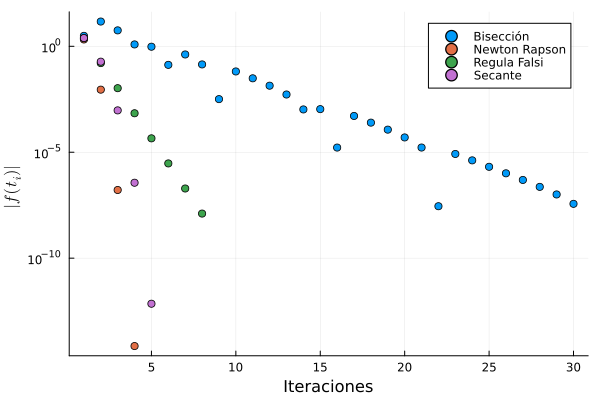

In [52]:
scatter(abs.(enc_bis[3]), label="Bisección")
scatter!(abs.(enc_nr[3]), label="Newton Rapson")
scatter!(abs.(enc_rf_franco[3]), label="Regula Falsi")
scatter!(abs.(enc_sec[3]), label="Secante")

plot!(xlabel="Iteraciones")
plot!(ylabel=L"|f(t_i)|")
plot!(yscale=:log)

In [57]:
t_bis = last(enc_bis[1])
x_bis = x1(t_bis)
e_bis = last(enc_bis[2])
n_bis = length(enc_bis[1])

t_nr = last(enc_nr[1])
x_nr = x1(t_nr)
e_nr = last(enc_nr[2])
n_nr = length(enc_nr[1])

t_sec = last(enc_sec[1])
x_sec = x1(t_sec)
e_sec = last(enc_sec[2])
n_sec = length(enc_sec[1])

t_rf_franco = last(enc_rf_franco[1])
x_rf_franco = x1(t_rf_franco)
e_rf = last(enc_rf_franco[2])
n_rf = length(enc_rf_franco[1])

8

In [73]:
table = DataFrame(M = ["Bisección", "Newton-Rapson", "Secante", "Regula Falsi"],
                  T = [t_bis      , t_nr           , t_sec    , t_rf_franco   ],
                  X = [x_bis      , x_nr           , x_sec    , x_rf_franco   ],                  
                  E = [e_bis      , e_nr           , e_sec    , e_rf          ])

Row,M,T,X,E
,String,Float64,Float64,Float64
1,Bisección,2.27516,-6.89936,2.04672e-9
2,Newton-Rapson,2.27516,-6.89936,5.1976e-9
3,Secante,2.27516,-6.89936,1.1441e-8
4,Regula Falsi,2.27516,-6.89936,5.71595e-9
